In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

from datetime import datetime
from scipy.stats import linregress

In [2]:
# heart rate
heart_rate = pd.read_csv('Data/heartrate_seconds_merged.csv')
heart_rate.Time = heart_rate.Time.apply(lambda s: datetime.strptime(s, '%m/%d/%Y %I:%M:%S %p'))

# only select heart rates between 07:00 and 22:00
heart_rate = heart_rate.iloc[pd.DatetimeIndex(heart_rate['Time']).indexer_between_time('7:00','22:00')]

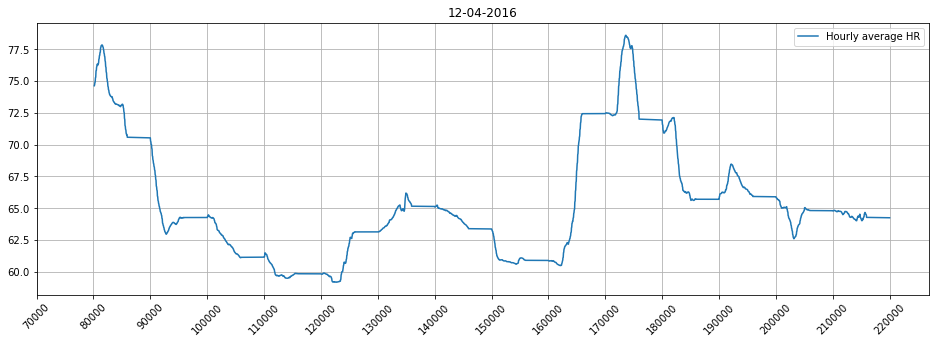

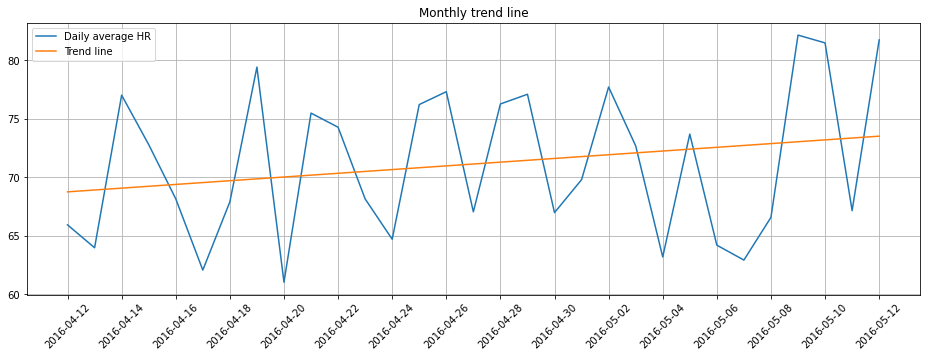

There is an upward trend.


In [169]:
p1 = 5553957443
p2 = 6962181067

new_df = heart_rate[heart_rate.Id == p1]

# 12-04-2016
test = new_df.loc[(new_df.Time.dt.year == 2016) & (new_df.Time.dt.month == 4) & (new_df.Time.dt.day == 12)]
test = test.set_index(test.Time.dt.time)
test['intTime'] = test.Time.dt.time.astype(str).str.replace(":", "").astype(int)

# plot figure
plt.figure(figsize = (16, 5))
plt.title('12-04-2016')

plt.plot(test.intTime, test.Value.rolling(440).mean(), label = 'Hourly average HR') 
plt.xticks([x for x in range(70000, 220001, 10000)], rotation = 45)

plt.legend()
plt.grid()
plt.show()

print('\n')

# monthly trend line
rijst = new_df.copy()
rijst['date'] = rijst.Time.dt.date

df = pd.DataFrame(rijst.groupby('date').Value.mean())
old = df.index

# need ordinal index for regression
df.index = df.index.map(dt.date.toordinal)

slope, intercept, r_value, p_value, std_error = linregress(df.index, df.Value)

# build trend line
x_endpoints = pd.DataFrame([df.index[0], df.index[-1]])
y_endpoints = intercept + slope * x_endpoints

# reset index for the right xticks
df.index = old

# plot figure 
plt.figure(figsize = (16, 5))
plt.title('Monthly trend line')

plt.plot(df.index, df, label = 'Daily average HR')
plt.plot([dt.date.fromordinal(i[0]) for i in x_endpoints.values], y_endpoints.values, label = 'Trend line')

plt.xticks(df.index[0::2], rotation = 45)

plt.grid()
plt.legend()
plt.show()

if slope > 0:
    print('There is an upward trend.')
elif slope < 0:
    print('There is a downward trend')
else:
    print('Wtf is happening?')